In [1]:
import pandas as pd
import numpy as np

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [19]:
df = pd.read_csv('/content/ai_job_trends_dataset.csv')

In [20]:
df.columns = df.columns.str.strip()

In [21]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [22]:
print(df.describe(include='all'))

                  Job Title       Industry  Job Status AI Impact Level  \
count                 30000          30000       30000           30000   
unique                  639              8           2               3   
top     Surveyor, insurance  Entertainment  Increasing        Moderate   
freq                     75           3895       15136           10042   
mean                    NaN            NaN         NaN             NaN   
std                     NaN            NaN         NaN             NaN   
min                     NaN            NaN         NaN             NaN   
25%                     NaN            NaN         NaN             NaN   
50%                     NaN            NaN         NaN             NaN   
75%                     NaN            NaN         NaN             NaN   
max                     NaN            NaN         NaN             NaN   

        Median Salary (USD) Required Education  Experience Required (Years)  \
count          30000.000000     

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

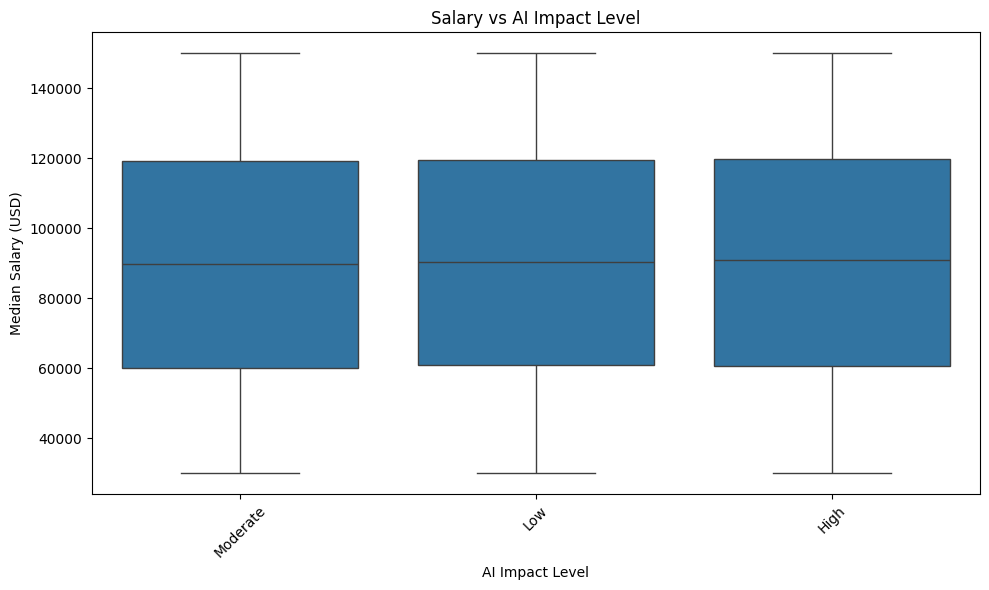

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='AI Impact Level', y='Median Salary (USD)')
plt.title('Salary vs AI Impact Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


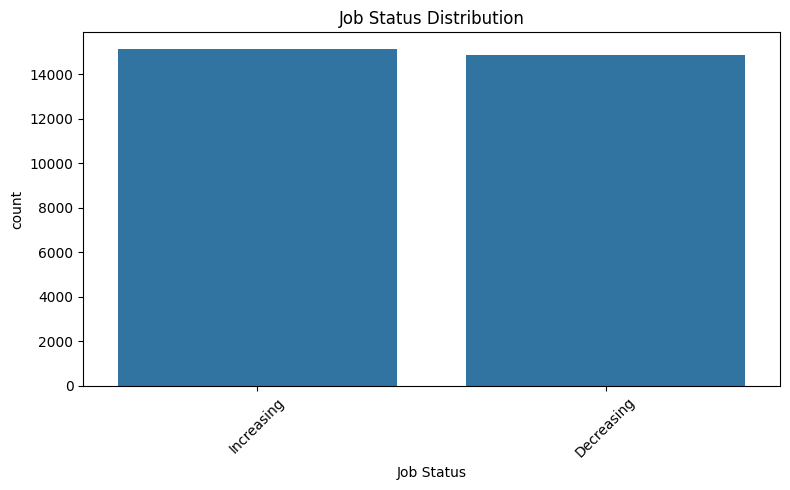

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Job Status')
plt.title('Job Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

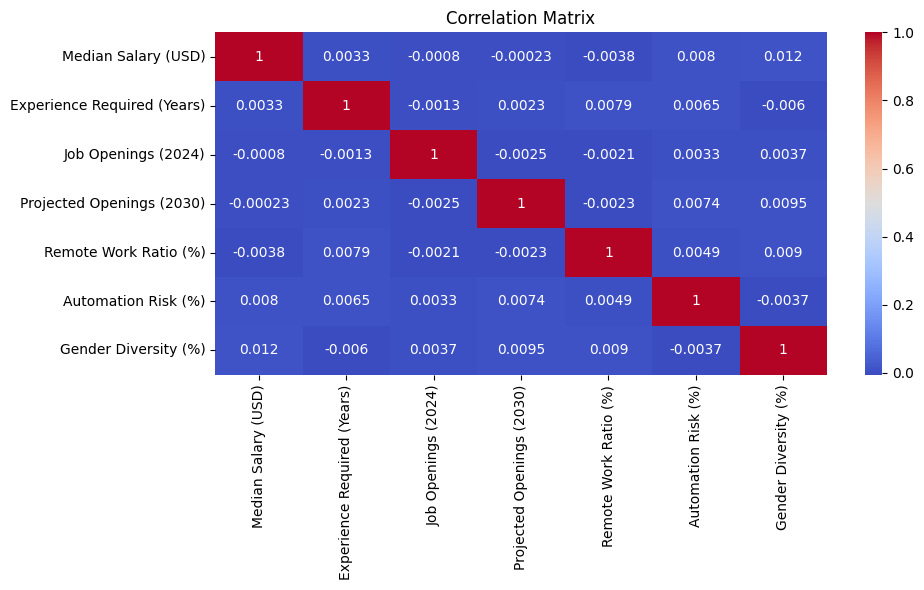

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [27]:
df['Salary_Class'] = pd.qcut(df['Median Salary (USD)'], q=3, labels=[0, 1, 2])

In [28]:
X = df.drop(columns=['Median Salary (USD)', 'Salary_Class'])
y = df['Salary_Class']

In [29]:
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [30]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X[categorical_features])
X_cat_df = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(categorical_features), index=X.index)

In [31]:
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_features])
X_num_df = pd.DataFrame(X_num, columns=numerical_features, index=X.index)

In [32]:
X_processed = pd.concat([X_num_df, X_cat_df], axis=1)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.33

Confusion Matrix:
 [[691 647 615]
 [728 664 613]
 [734 683 625]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.35      0.34      1953
           1       0.33      0.33      0.33      2005
           2       0.34      0.31      0.32      2042

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000



In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:09:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.33166666666666667

Confusion Matrix (XGBoost):
 [[673 663 617]
 [709 645 651]
 [681 689 672]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.33      0.34      0.34      1953
           1       0.32      0.32      0.32      2005
           2       0.35      0.33      0.34      2042

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000



In [39]:
pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [40]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nConfusion Matrix (CatBoost):\n", confusion_matrix(y_test, y_pred_cat))
print("\nClassification Report (CatBoost):\n", classification_report(y_test, y_pred_cat))


CatBoost Accuracy: 0.3268333333333333

Confusion Matrix (CatBoost):
 [[645 675 633]
 [678 669 658]
 [689 706 647]]

Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.32      0.33      0.33      1953
           1       0.33      0.33      0.33      2005
           2       0.33      0.32      0.33      2042

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000

